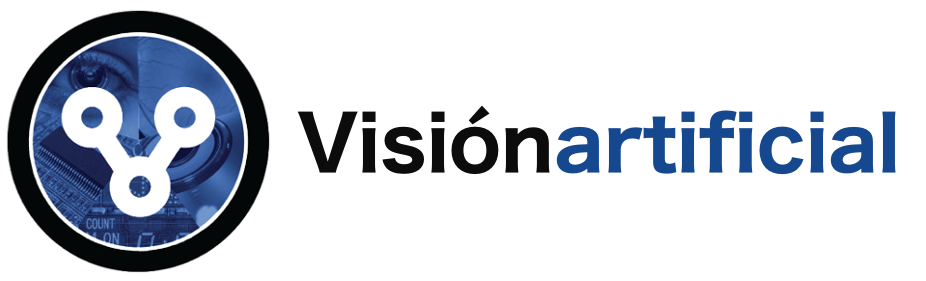

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<h1 style="font-size:30px;">Operacións lóxicas </h1>

As operacións lóxicas adoitan empregarse con máscaras binarias para procesar porcións selectivas dunha imaxe. Neste caderno cubriremos:

* Introdución aos operadores lóxicos
* Operacións a bits en imaxes: AND, NOT, OR, XOR
* Exemplo de manipulación de logotipos 

# 1. Introdución ás operacións lóxicas

A seguinte táboa resume os catro operadores lóxicos que se tratarán neste caderno. Tamén se amosan as saídas de cada operador para as combinacións de entrada `A` e` B`. Os valores de `A` e `B` son "0" ou "1" porque estes operadores lóxicos realizaranse nos bits que se usan para representar intensidades de píxeles. 

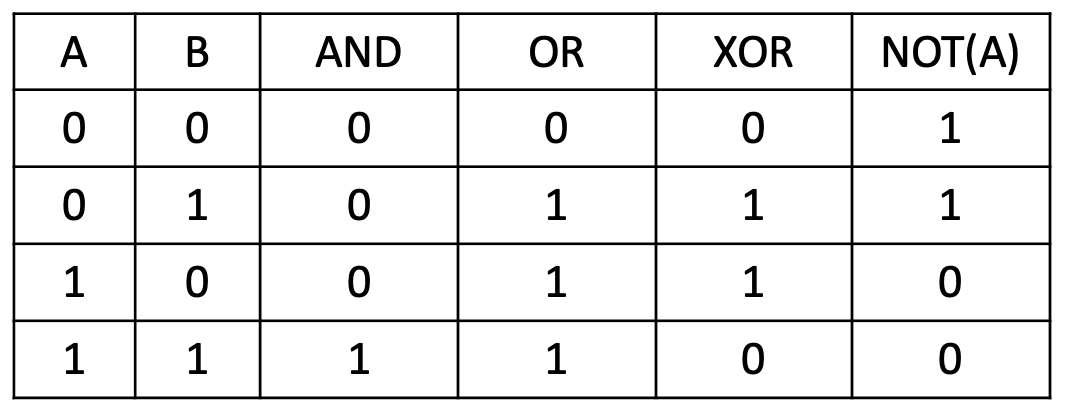

### <font style="color:rgb(50,120,230)">Notación binaria </font>
Os seguintes exemplos mostran como a intensidade de 255 (branco), 42 (gris escuro) e 0 (negro) represéntanse como números binarios: `11111111`,` 00101010` e `00000000`, respectivamente. Son representacións de 8 bits e usaremos esta notación cando traballemos con operadores lóxicos. Como podes ver, 255 é o maior número que se pode representar cun enteiro sen asinar de 8 bits. 

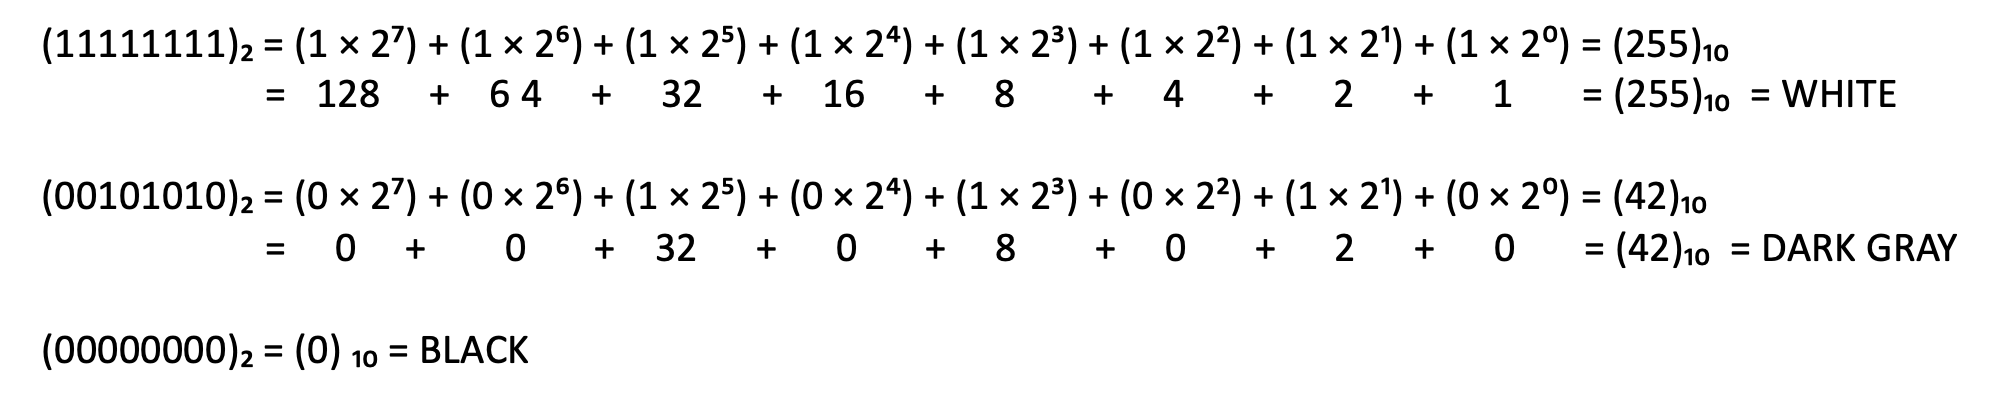

### <font style="color:rgb(50,120,230)">Exemplos de operacións binarias </font>
Aquí tes catro exemplos de como se aplican os operadores lóxicos `AND` e` OR` a enteiros de 8 bits sen signo. Nestes exemplos exploramos as operacións lóxicas sobre intensidades de píxeles de 0, 42 e 255 (é dicir, negro, gris escuro e branco).

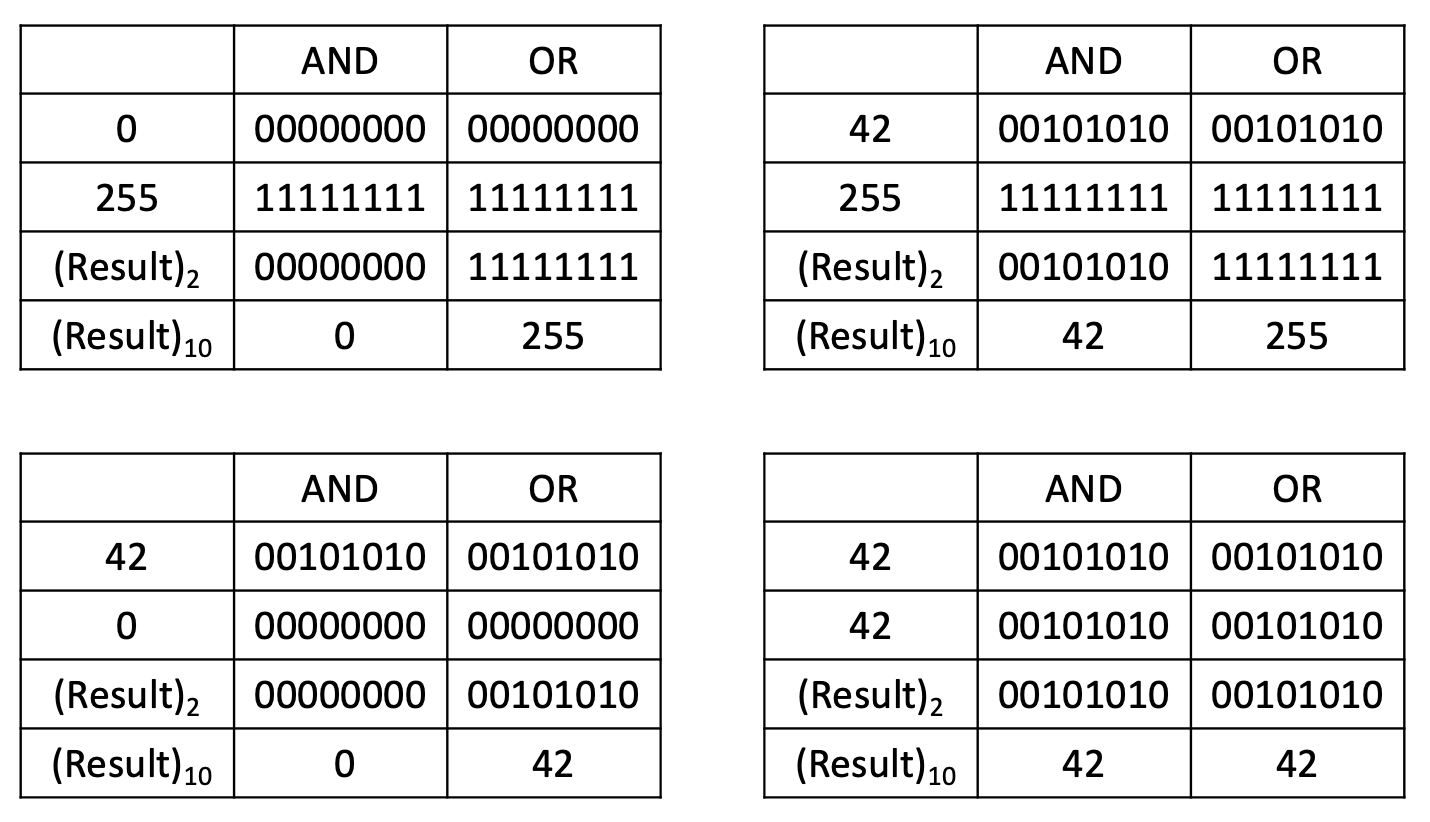

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'


# 2. Operacións con bits en imaxes 

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Sintaxe da función</font>

Exemplo de  API para **`bitwise_and()`**. Outros incluidos: **`bitwise_not()`**, **`bitwise_or()`**, **`bitwise_xor()`** 

``` python
dst = cv.bitwise_and( src1, src2[, dst[, mask]] )
```

`dst`: Matriz de saída que ten o mesmo tamaño e tipo que as matrices de entrada.

A función ten **2 argumentos necesarios**:

1. `src1`: primeira matriz de entrada ou un escalar.
2. `src2`: segunda matriz de entrada ou un escalar.

Un argumento opcional importante é:

1. `mask`: opcional, é unha matriz de 8 bits, que especifica os elementos que serán cambiados. 

### <font color="green">Documentación de Opencv</font>

[**`bitwise_and()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)
[**`bitwsie_not()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f)
[**`bitwise_or()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gab85523db362a4e26ff0c703793a719b4)
[**`bitwise_xor()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga84b2d8188ce506593dcc3f8cd00e8e2c)

[**Tutorial sobre operacións aritméticas**](https://docs.opencv.org/4.5.2/d0/d86/tutorial_py_image_arithmetics.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Lemos e visualizamos as imaxes</font>

/home/lkipo/.virtualenvs/VAA/lib64/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/lkipo/.virtualenvs/VAA/lib64/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


(200, 499)


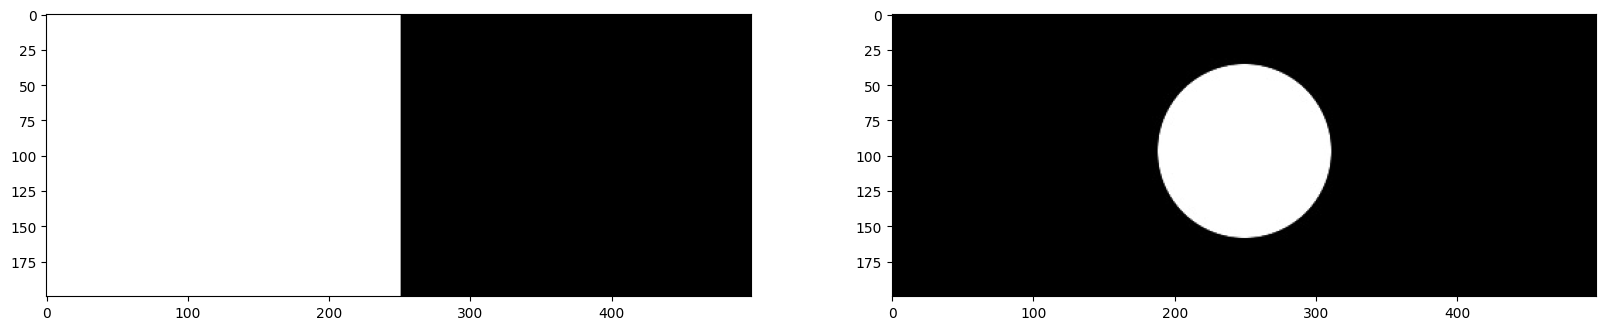

In [3]:
img_rec = cv.imread('./data/rectangle.jpg', cv.IMREAD_GRAYSCALE)
img_cir = cv.imread('./data/circle.jpg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize = [20,5])
plt.subplot(121);  plt.imshow(img_rec)
plt.subplot(122);  plt.imshow(img_cir)
print(img_rec.shape)

### <font style="color:rgb(50,120,230)">Operador AND </font>
A fucnión `bitwise_and()` devolverá

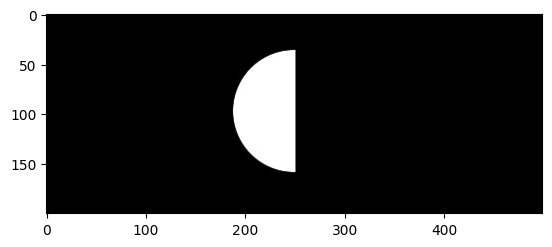

In [4]:
result = cv.bitwise_and(img_rec, img_cir, mask = None)

plt.imshow(result)

### <font style="color:rgb(50,120,230)">Operador OR </font>

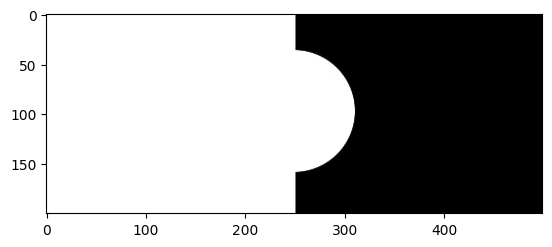

In [5]:
result = cv.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(result)

### <font style="color:rgb(50,120,230)">OPerador XOR </font>

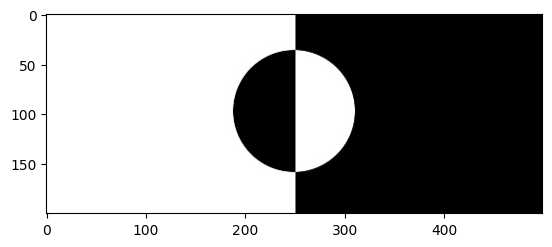

In [6]:
result = cv.bitwise_xor(img_rec, img_cir, mask = None)
plt.imshow(result)

# 2. Exemplo de aplicación: manipulación do logotipo

Nesta sección mostrarémosche como encher as letras brancas do logotipo Consumer Reports cunha imaxe de fondo. 
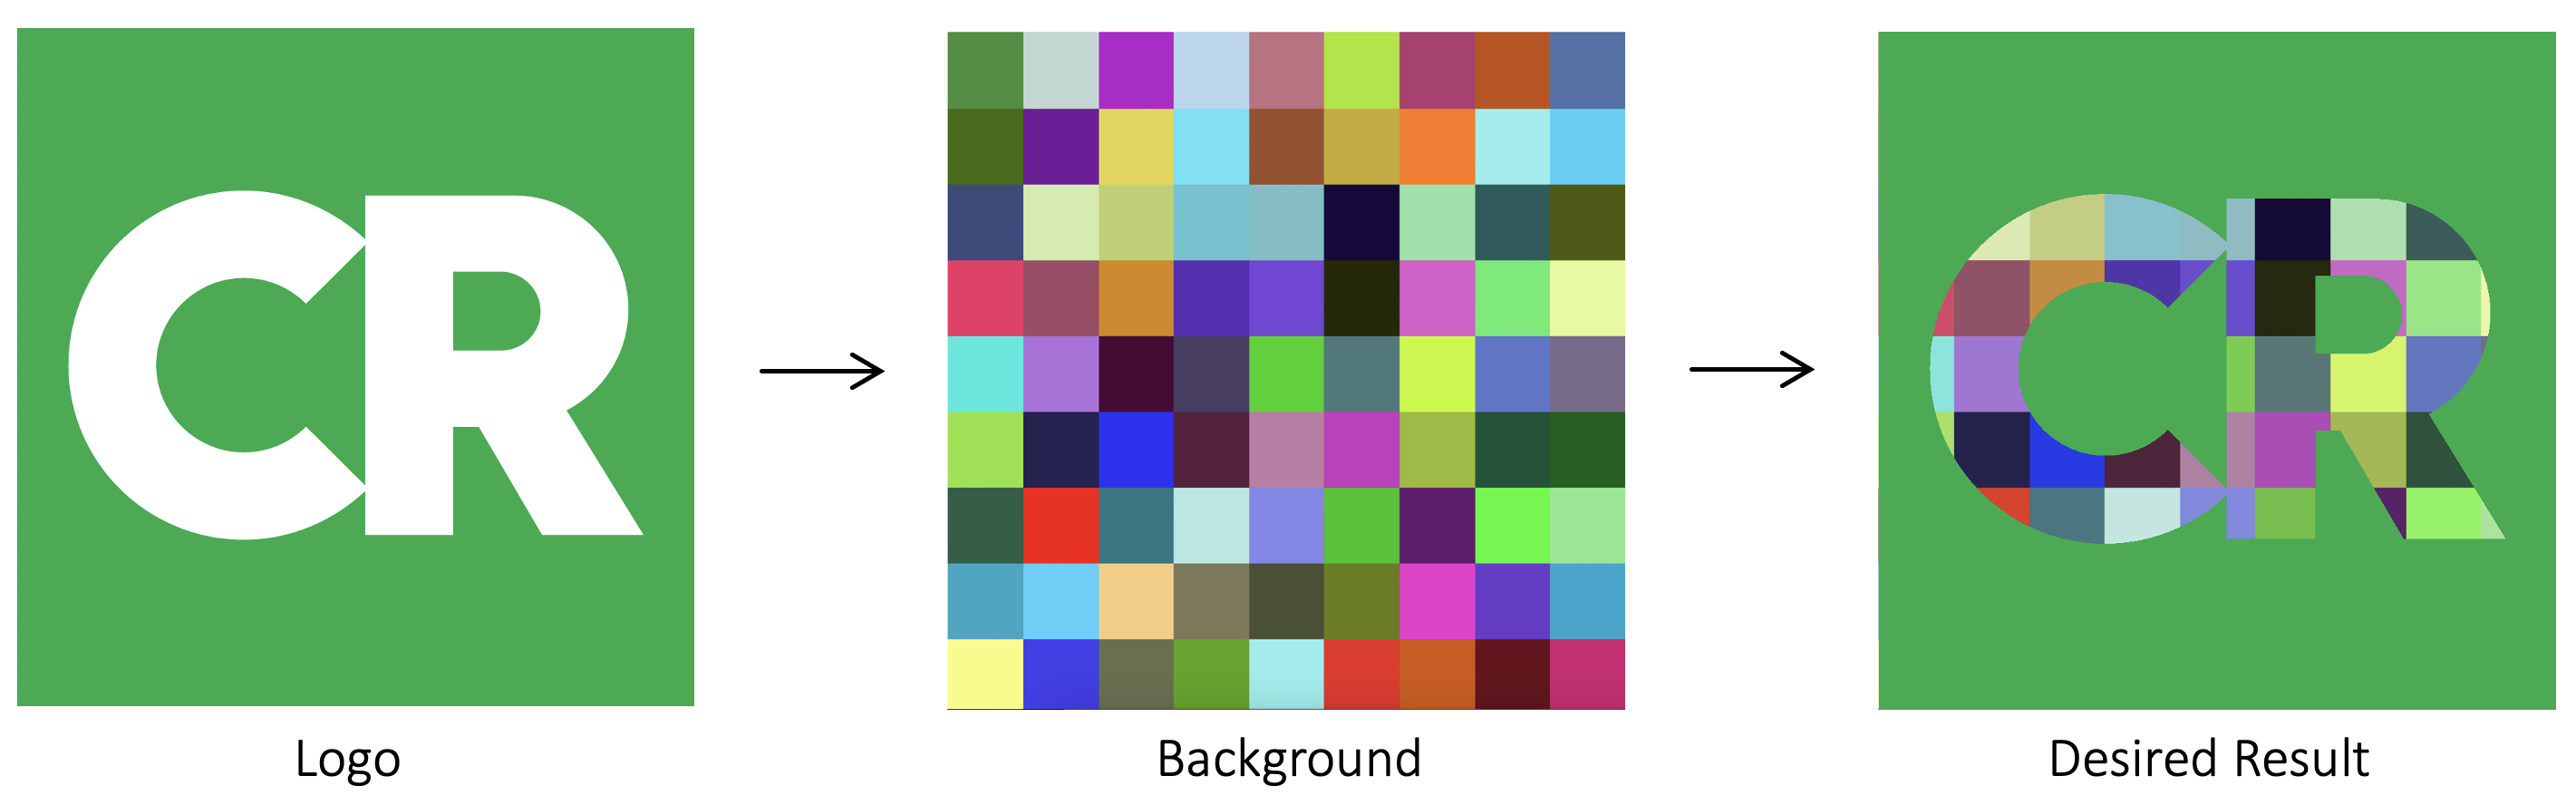

### <font style="color:rgb(50,120,230)">Lemos e visualiamos do logo</font>

(500, 500, 3)


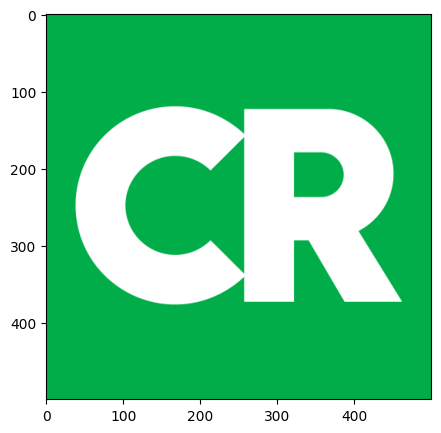

In [7]:
# Lemos o logo CR (foreground).
img_logo = cv.imread('./data/CR_Logo.png', cv.IMREAD_COLOR)

# Forma da imaxe
print(img_logo.shape)
logo_h = img_logo.shape[0]
logo_w = img_logo.shape[1]

# Visualizamos  imaxe
plt.figure(figsize = [5, 5])
plt.imshow(img_logo[:, :, ::-1])

### <font style="color:rgb(50,120,230)">Le a imaxe de fondo (xadrez) </font> 

In [8]:
# Lemos a imaxe de fondo (background).
img_background = cv.imread('./data/checkerboard_color.png', cv.IMREAD_COLOR)

# Forma da imaxe
print(img_background.shape)

(900, 900, 3)


### <font style="color:rgb(50,120,230)">Redimensiona a imaxe de fondo e visualizamola </font> 

(500, 500, 3)


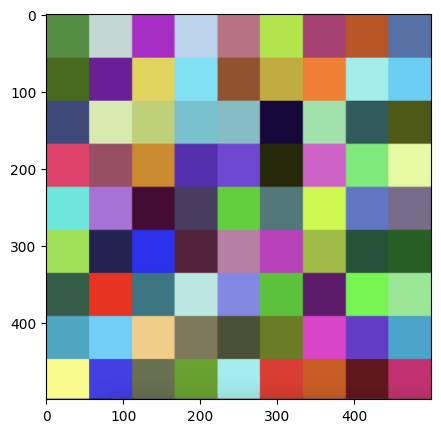

In [9]:
# Dimensión da imaxe de fondo e logo deben coincidir.
dim = (logo_w, logo_h)

# Redimensionamos a imaxe do fondo ás de logo.
img_background = cv.resize(img_background, dim, interpolation = cv.INTER_AREA)

# confirmamos que todo foiben.
print(img_background.shape)

# Visualizamos a imaxe
plt.figure(figsize = [5, 5])
plt.imshow(img_background[:, :, ::-1])

### <font style="color:rgb(50,120,230)">Crea unha máscara a partir da imaxe do logotipo </font>

(500, 500)


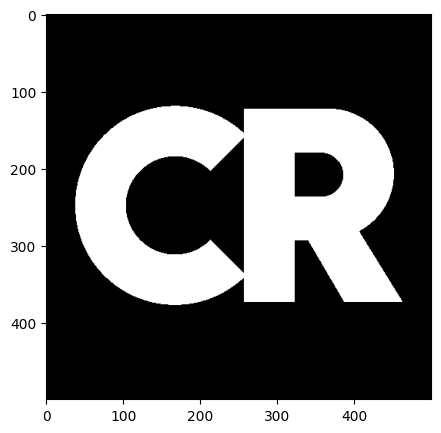

In [10]:
# Convertemos a imaxe a gris.
img_logo_gray = cv.cvtColor(img_logo, cv.COLOR_RGB2GRAY)

# Apliamos un limiar global e creamos unha imaxe binaria do loogo.
retval, img_logo_mask = cv.threshold(img_logo_gray, 127, 255, cv.THRESH_BINARY)

# Forma da imaxe
print(img_logo_mask.shape);

# Visualizamos
plt.figure(figsize = [5, 5])
plt.imshow(img_logo_mask)

### <font style="color:rgb(50,120,229)">Aplicamos a máscara á imaxe de fondo </font> 

(500, 500, 3)


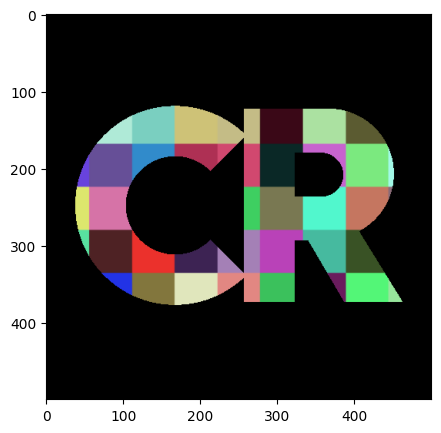

In [11]:
# Creamos as letras CR con fondo de cores.
img_background = cv.bitwise_and(img_background, img_background, mask = img_logo_mask)

# Print the image shape.
print(img_background.shape);

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_background)

### <font style="color:rgb(50,120,230)">Invertimos a máscara</font>

(500, 500)


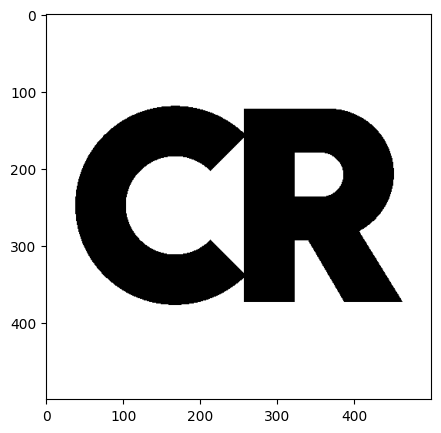

In [12]:
# Mascara inversa.
img_logo_mask_inv = cv.bitwise_not(img_logo_mask)

# Informamos das dimensións
print(img_logo_mask_inv.shape)

# Visualizamos a imaxe
plt.figure(figsize = [5, 5])
plt.imshow(img_logo_mask_inv)

### <font style="color:rgb(50,120,229)">Aillamos o primeiro plano do logo</font>

(500, 500, 3)


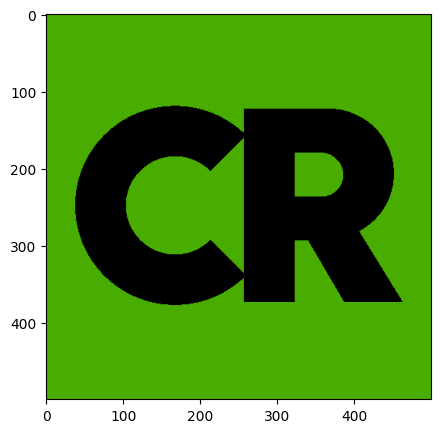

In [13]:
# Aillamos o primimeiro plano do logo empregando a máscara inversa.
img_foreground = cv.bitwise_and(img_logo, img_logo, mask = img_logo_mask_inv)

# Forma da imaxe.
print(img_foreground.shape)

# Visualizamos
plt.figure(figsize = [5, 5])
plt.imshow(img_foreground)

### <font style="color:rgb(50,120,229)">Resultado final: Engadimos o fondo e o primeiro plano</font>

True

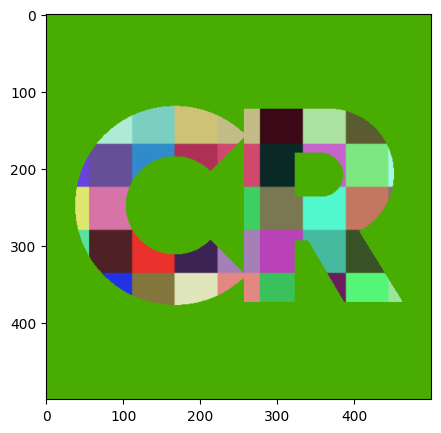

In [14]:
# Sumamos os resultados intermedios para obeter o resultado final.
result = cv.add(img_background,img_foreground)

# Visualozamos o resultado e o salvamos a disco.
plt.figure(figsize = [5, 5])
plt.imshow(result)
cv.imwrite('logo_final.png', result[:, :, ::-1])

# 3. Exercicio

Dadas as dúas primeiras imaxes, buscamos conseguir a terceira
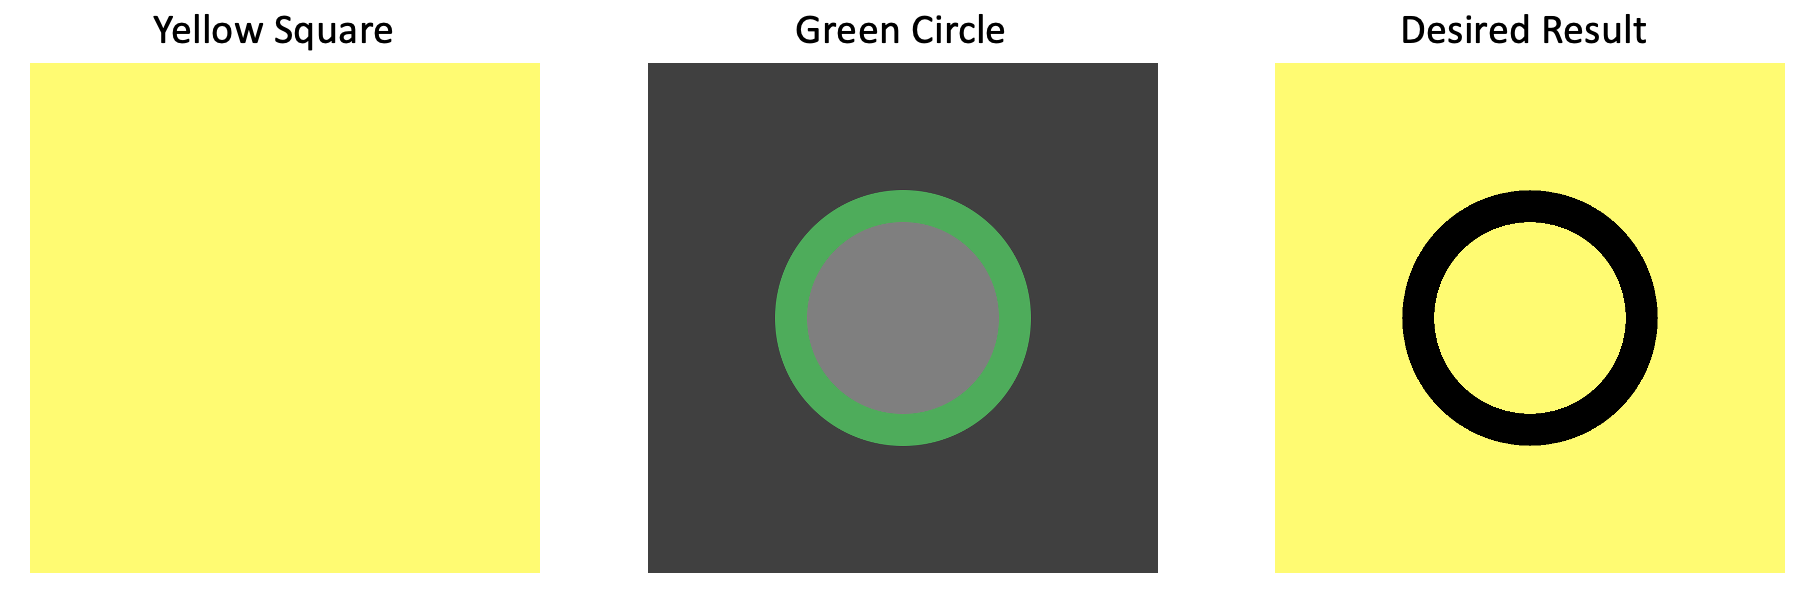

### <font style="color:rgb(50,120,230)">Le e visualizas as imaxe (completao ti)</font>

cadrado amarelo:  (600, 600, 3)
circulo gris:    (1000, 1000, 3)


Text(0.5, 1.0, 'Circulo gris')

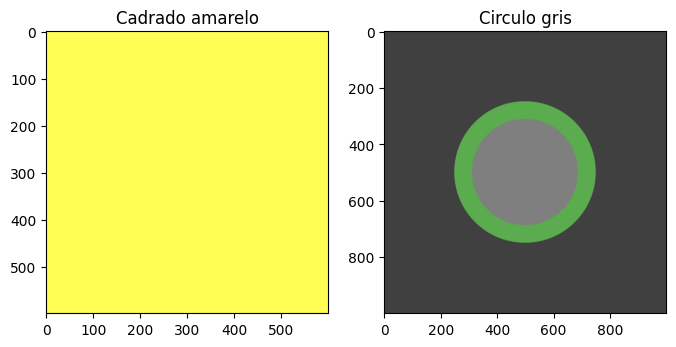

In [15]:
#Lemos a imaxe do cadrado ('yellow_square.png')
img_yellow_square = cv.imread('./data/yellow_square.png', cv.IMREAD_COLOR)

# Lemos a imaxe do circulo.
img_green_circle = cv.imread('./data/green_circle.png', cv.IMREAD_COLOR)

print('cadrado amarelo: ', img_yellow_square.shape)
print('circulo gris:   ', img_green_circle.shape)

# Visualiza as imaxe.
plt.figure(figsize = (8, 8))
plt.subplot(121); plt.imshow(img_yellow_square[:, :, ::-1]); plt.title('Cadrado amarelo')
plt.subplot(122); plt.imshow(img_green_circle);              plt.title('Circulo gris')

### <font style="color:rgb(50,120,230)">Redimensiona o cadrado amarelo(completao ti)</font>

Antes de poder realizar operacións lóxicas con estas imaxes, debemos facelas do mesmo tamaño. 

In [16]:
# Redimensiona o fondo (amarelo) ao mesmo tamaño ca do circulo verde.
dim = (img_green_circle.shape[1], img_green_circle.shape[0])

# Redimensionamos o cadradi amarelo
img_yellow_square = cv.resize(img_yellow_square, dim, interpolation=cv.INTER_AREA)

# Confirmamos que todo foi ben.
print('cadrado amarelo: ', img_yellow_square.shape)
print('circulo gris: ', img_green_circle.shape)

cadrado amarelo:  (1000, 1000, 3)
circulo gris:  (1000, 1000, 3)


### <font style="color:rgb(50,120,230)">Código do exercicio</font>

Completa o código na cela de abaixo

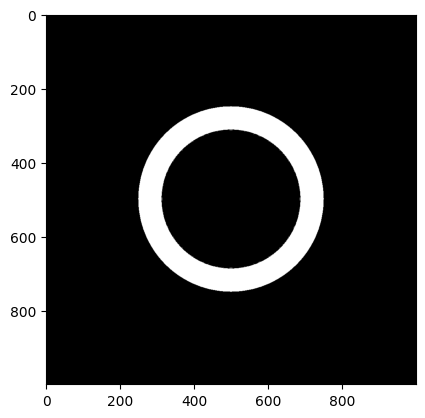

In [32]:
# Convertemos a gris o circulo verde con cvtColor()
# PON O TEU CODIGO AQUI
img_gray_circle = cv.cvtColor(img_green_circle, cv.COLOR_BGR2GRAY)

# Emprega a función threshold() para crear unha mascara binaria (anel branfo dendo duncadrado negro).
# Pista: Precisaras elexir COIDADOSAMENTE un limiar para aillar os pixel do anel (branco) dos do fondo (negros).
# YOUR CODE HERE
retval, img_ring_mask = cv.threshold(img_gray_circle, 127, 255, cv.THRESH_BINARY_INV)
plt.imshow(img_ring_mask)

# Emprega bitwise_not() para crear unha mascara inversa.
# PON O TEU CODIGO AQUI
# img_ring_mask_inv = 

# Emprega bitwise_and() para crear a combinación final buscada
# PON O TEU CODIGO AQUI
# img_combined = 

# Visualiza as imaxes
# DESCOMENTA AS LIÑAS SEGUINTES
# plt.figure(figsize = [20,10])
# plt.subplot(141); plt.imshow(img_gray_circle);          plt.title('Imaxe en escala de grises')
# plt.subplot(142); plt.imshow(img_ring_mask);            plt.title('Mascara')
# plt.subplot(143); plt.imshow(img_ring_mask_inv);        plt.title('Mascara inversa')
# plt.subplot(144); plt.imshow(img_combined[:, :, ::-1]); plt.title('Combinada')

Os teus resultados deben ser coma estes.

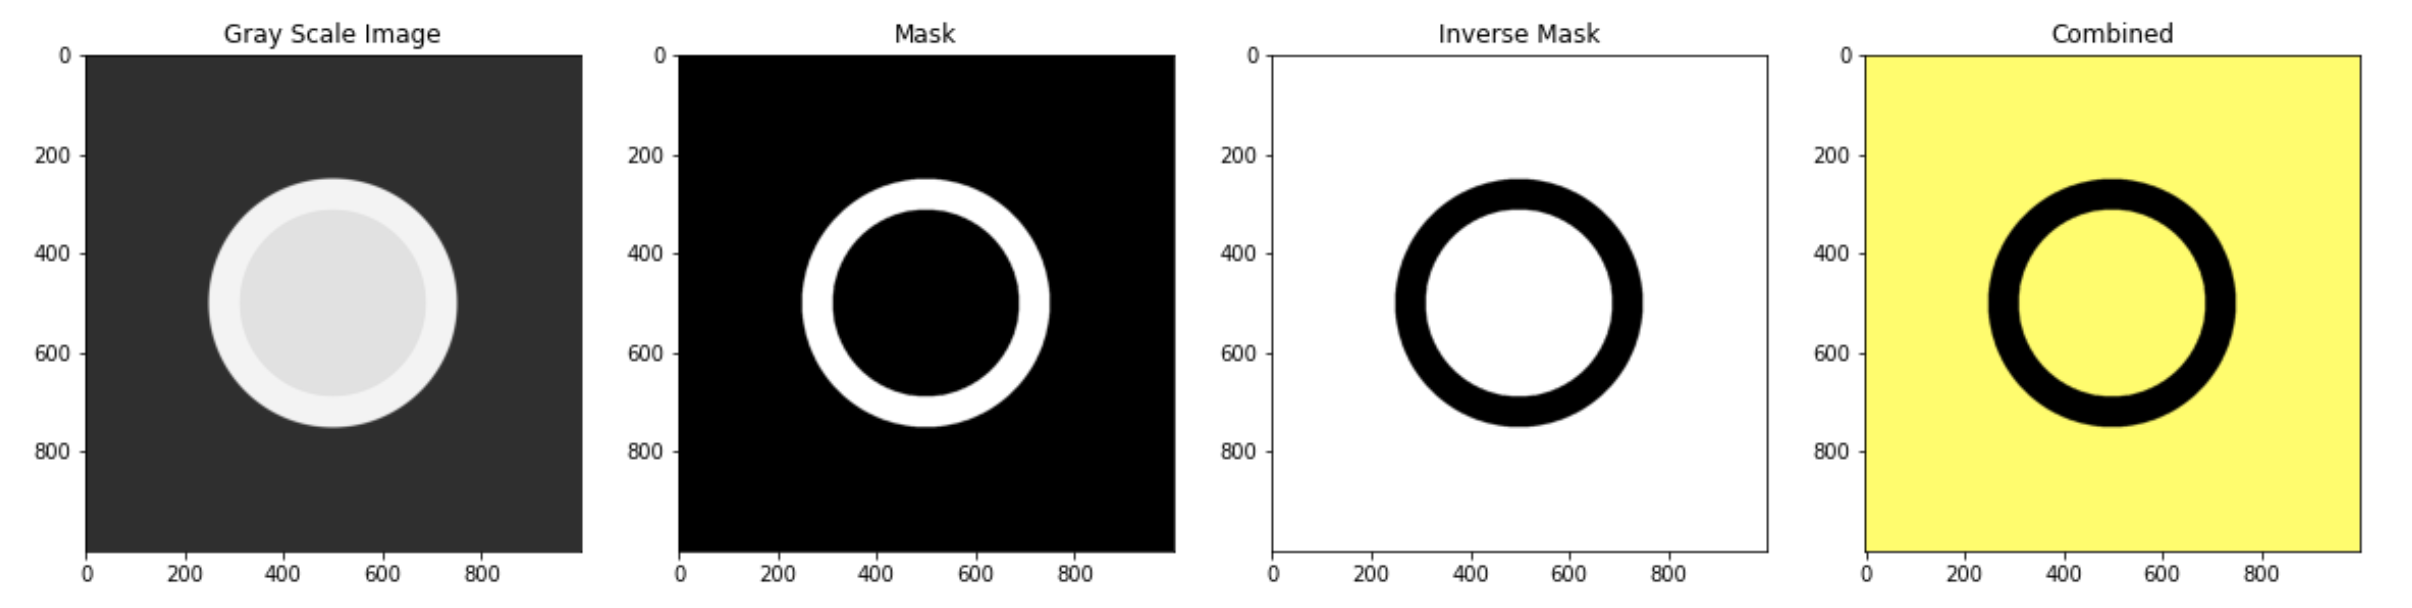